Non-local games are a good example to show how quantum entanglement might help us to get better results in XOR games.

For this example, we are focused to study the CHSH game, based on the CHSH inequality, but before starting we have to do some definitions to clarify the scenario in which we will play and the language we are going to use.

In this kind of game, there are two players, Alice and Bob, who cooperate with each other to win. For this, they must respond to the question made for the referee (also called the verifier). The players win the game if they answer correctly the question made for the referee. It is important to make clear that, after to receive the question, Alice and Bob can't communicate each other. 


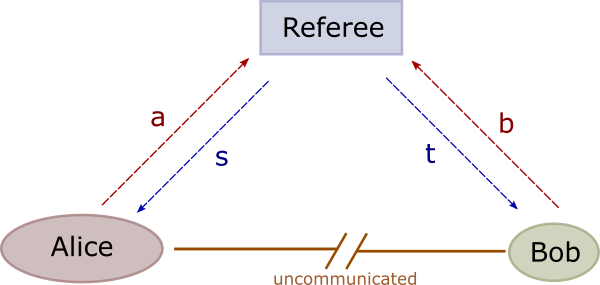


Some mathematician definitions will help us to describe the situation. Let $\pi$ be a probability distribution for all the questions that the referee may ask, that is $(s,t) \in S \times T$. Alice must send her to answer $a \in A$ to the referee, the same as Bob with $b \in B$. Let $V$ be a function (called predicate) of $(s,t,a,b)$ that evaluates if Alice and Bob answer correctly the questions $(s,t)$. The players win the game if $V = 1$, or lose otherwise.

The rules for the CHSH game are, then, simple to understand. Let $S=T=A=B= \{ 0,1 \}$ and consider $\pi$ an uniform distribution for $S \times T$. Then, the predicate is

\begin{equation}
V (a,b|s,t) = \begin{cases}
1, \mathrm{\ if\ } s \cdot t = a\oplus b\\
0, \mathrm{\ otherwise}
\end{cases}
\end{equation}

Then, the probability that the players win the game is given by

\begin{equation}
p_{\mathrm{win}} = \frac{1}{4} \sum_{a,b,s,t} V (a,b|s,t) p (a,b|s,t).
\end{equation}

So, if the referee sends a bit 00, 01, or 10, then Alice and Bob must send the same bit. Then, before the game start, they agree to always send back to the referee the bit 00 (or 11). With this, they win in three of the four possibilities depending on the bit sent by the referee, thus the winning probability is $75 \%$. This is the best strategy for the players, apparently.

Let $\alpha$ the win probability $p_{w}$ minus the lose probability $p_{l}$. If $p_{w} \leq 3/4$, since $p_w + p_l = 1$, then $\alpha \leq 1/2$. Now we define $S_{\mathrm{CHSH}} := 4 \alpha$ and, for a classical strategy, this quantity must satisfy \begin{equation}
| S_{\mathrm{CHSH}} | \leq 2.
\end{equation}

Suppose that Alice and Bob are allowed to use a quantum strategy, that is, they are to be able to share an entangled quantum state
\begin{equation}
| \Psi \rangle_{\mathrm{A}\mathrm{B}} = \frac{1}{\sqrt{2}} (| 0 \rangle_{\mathrm{A}} | 0 \rangle_{\mathrm{B}} + |  1\rangle_{\mathrm{A}} | 1 \rangle_{\mathrm{B}} ),
\end{equation}
this won't break the rules because they are still separate and without communicating with each other.


We can expect that, a quantum strategy, involves measurements. So, let $\{ \Pi_{a}^{(s)} \}$ the local projective measurement made by Alice, where $\sum_a \Pi_{a}^{(s)} = I$. Similarly, let $\{ \Pi_{b}^{(t)} \}$ the local projective measurement made by Bob, where $\sum_a \Pi_{b}^{(t)} = I$. The, the winning probability is given by

\begin{equation}
p_{\mathrm{win}} = \frac{1}{4} \sum_{a,b,s,t} V (a,b|s,t) \langle \Psi |_{\mathrm{A}
\mathrm{B}} \Pi_{a}^{(s)} \otimes \Pi_{b}^{(t)} | \Psi \rangle_{\mathrm{A}\mathrm{B}}.
\end{equation}

Like the classical strategy, Alice and Bob focus on the cases where the referee sends the bits 00, 01, and 10. With this, the players win if they send back the same bit. Let $p_w$ the probability for this, then
\begin{equation}
p_w = \langle \Psi |_{\mathrm{A}\mathrm{B}} \Pi_{0}^{(s)} \otimes \Pi_{0}^{(t)} + \Pi_{1}^{(s)} \otimes \Pi_{1}^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}},
\end{equation}
whereas the probability of sending back a different bit is
\begin{equation}
p_l = \langle \Psi |_{\mathrm{A}\mathrm{B}} \Pi_{0}^{(s)} \otimes \Pi_{1}^{(t)} + \Pi_{1}^{(s)} \otimes \Pi_{0}^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}}.
\end{equation}

Then, the winning probability less the loss probability may be written as
\begin{equation}
\alpha = \langle \Psi |_{\mathrm{A}\mathrm{B}} \Pi_{0}^{(s)} \otimes \Pi_{0}^{(t)} + \Pi_{1}^{(s)} \otimes \Pi_{1}^{(t)} - \Pi_{0}^{(s)} \otimes \Pi_{1}^{(t)} - \Pi_{1}^{(s)} \otimes \Pi_{0}^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}} =
\langle \Psi |_{\mathrm{A}\mathrm{B}} A^{(s)} \otimes B^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}},
\end{equation}
with
\begin{align}
A^{(s)} &= \Pi_{0}^{(s)} - \Pi_{1}^{(s)},\\
B^{(t)} &= \Pi_{0}^{(t)} - \Pi_{1}^{(t)}.
\end{align}

Let
\begin{equation}
S = A^{(0)} \otimes B^{(0)} + A^{(0)} \otimes B^{(1)} + A^{(1)} \otimes B^{(0)} - A^{(1)} \otimes B^{(1)}.
\end{equation}

Then, let's use our script to find the value of $S$.

In [1]:
#usamos el programa para violar la desigualdad de bell y mostrar que el valor de S es superior a 2. 
#Luego, reconstruimos la probabilidad de victoria en terminos del valor entregado por el programa

In [2]:
#una vez resuelto el problema, realizamos multiples mediciones para encontrar el limite de tsirelson de nuestra desigualdad
#encontrando asi que S tiene un bound en 2*raiz-de-2. Asi, la probabilidad máxima de victoria es ahora de un 85%

In [2]:
import qiskit
from qiskit import QuantumCircuit, Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import numpy as np

import sys
sys.path.append('..')

import bell_checker
from bell_checker.circuit_maker import CircuitMaker

ModuleNotFoundError: No module named 'bell_checker'

In [ ]:
#  Input: matrices observables

obs = [ [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2)],
         [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ]]



#number_of_thetas = 15
#theta_vec = np.linspace(0,2*np.pi,number_of_thetas)


S = 2
Sabxy = [(1,-1,-1,1), (1,-1,-1,1), (-1,1,1,-1), (1,-1,-1,1)]

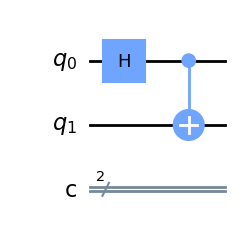

In [ ]:
init_state = QuantumCircuit(len(obs), len(obs) )
init_state.h(0)
init_state.cx(0,1)
init_state.draw(output='mpl')

In [ ]:
circuits        = CircuitMaker(auto=True)
# bell_circuits   = circuits.constructor( init_state, obs , theta_vec )
bell_circuits   = circuits.constructor( init_state, obs )
bell_circuits[0].draw(output='mpl')

AttributeError: 'CircuitInstruction' object has no attribute 'draw'